In [47]:
%matplotlib inline

In [48]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
#from scipy.stats import lineregress

In [49]:
# Study data files


mouse_df = pd.read_csv("Mouse_metadata.csv")
study_df = pd.read_csv("Study_results.csv")

# Combine the data into a single dataset

summary_df = pd.merge(study_df,mouse_df,how = 'left',on = 'Mouse ID')

# Display the table for preview

summary_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [50]:
# Checking the number of mice.

#summary_df["Mouse ID"].nunique() or we can use the below 
# nunique returns the number of all unique values

len(summary_df["Mouse ID"].unique())



249

In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = summary_df.loc[summary_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicate_mice


array(['g989'], dtype=object)

In [52]:
# Optional: Get all the data for the duplicate mouse ID.

#duplicate_data = summary_df[summary_df.duplicated(["Mouse ID","Timepoint"])]
duplicate_data = summary_df[summary_df[['Mouse ID','Timepoint']].duplicated()]
duplicate_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [53]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_summary_df = summary_df[summary_df["Mouse ID"]!= "g989"] 

clean_summary_df



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [54]:
# Checking the number of mice in the clean DataFrame.

len(clean_summary_df["Mouse ID"].unique())



248

In [55]:
# SUMMARY STATISTICS

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

regimen_mean = clean_summary_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]


regimen_median = clean_summary_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

regimen_variance = clean_summary_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]


regimen_std = clean_summary_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

# standard error of mean 
regimen_sem = clean_summary_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]



#regimen_mean , regimen_median ,regimen_variance , regimen_std ,regimen_sem

# Assemble the resulting series into a single summary DataFrame.

summary_stats_df = pd.DataFrame({"MEAN Tumor Volume":regimen_mean,
                                 "MEDIAN Tumor Volume":regimen_median,
                                 "Tumor Volume Variance":regimen_variance,
                                 "Tumor Volume Std":regimen_std,
                                 "Tutor Volume SEM":regimen_sem})

summary_stats_df

,MEAN Tumor Volume,MEDIAN Tumor Volume,Tumor Volume Variance,Tumor Volume Std,Tutor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [56]:
# Using the aggregation method, produce the same summary statistics in a single line.

agg_summary_stats = clean_summary_df.groupby("Drug Regimen")

summary_stats_df = agg_summary_stats.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]

summary_stats_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


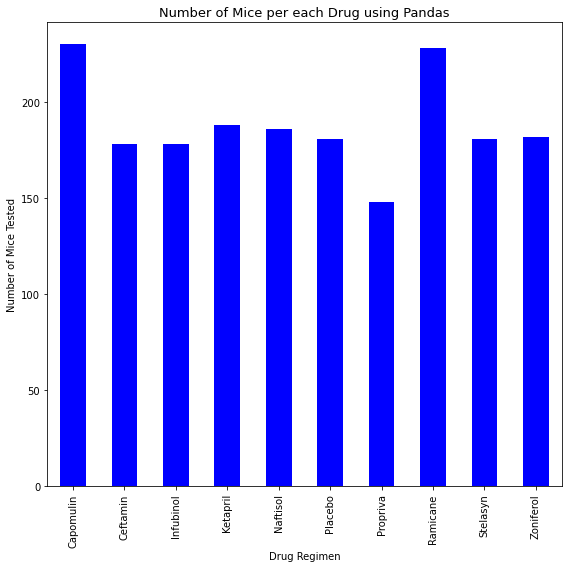

In [57]:
# BAR AND PIE CHARTS
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

micecount_per_treat = clean_summary_df.groupby(['Drug Regimen']).count()['Mouse ID']

plot1 = micecount_per_treat.plot.bar(figsize=(8,8), color='b',fontsize = 10)

plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice Tested",fontsize = 10)
plt.title("Number of Mice per each Drug using Pandas",fontsize = 13)

plt.savefig('plot1')


plt.tight_layout()
plt.show()




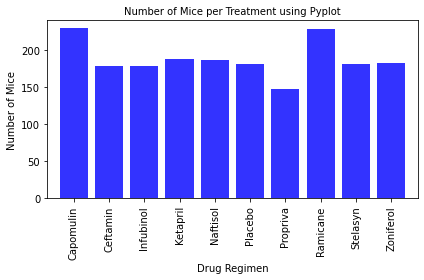

In [58]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


# Creating an array for mice list 

mice_list =(clean_summary_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
#mice_list

x_axis = np.arange(len(micecount_per_treat))

tick_locations = [x for x in x_axis] 


plt.bar(x_axis, mice_list, color='b', alpha=0.8, align='center')

plt.xticks(tick_locations,['Capomulin','Ceftamin','Infubinol','Ketapril',
                           'Naftisol','Placebo','Propriva','Ramicane','Stelasyn','Zoniferol'],rotation = 'vertical')


plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(mice_list)+10)

plt.title("Number of Mice per Treatment using Pyplot",fontsize = 10)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice",fontsize = 10)

plt.savefig('plot2')
plt.tight_layout()
plt.show()



In [59]:
# counting of female versus male mice using Pandas

gender_mice_list_df = clean_summary_df.groupby(['Sex'])

gender_count = gender_mice_list_df['Sex'].count()
gender_count



Sex
Female    922
Male      958
Name: Sex, dtype: int64

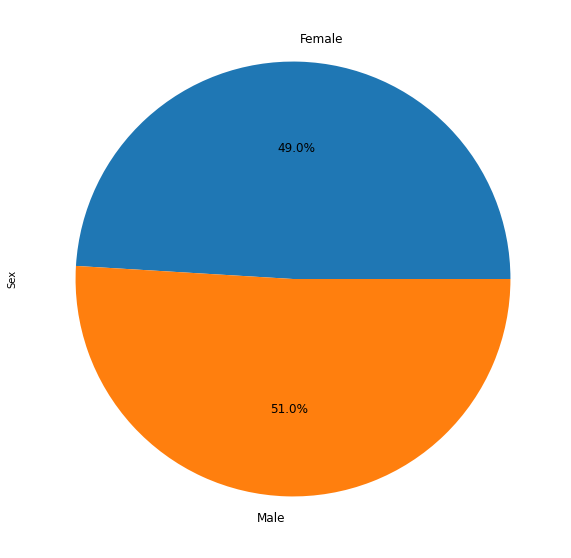

In [60]:
#Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_count.plot.pie(y='sex',subplots=True,autopct="%1.1f%%",figsize=(10,10),fontsize=12)

plt.savefig('plot3')
plt.show()


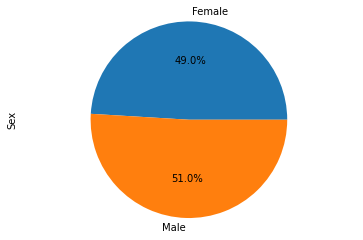

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels =["Female","Male"]

count=clean_summary_df.groupby(['Sex']).count()['Mouse ID'].tolist()
#count

       
plt.pie(count,labels = labels,autopct="%1.1f%%")

plt.ylabel('Sex')

plt.axis('equal')

plt.savefig('plot4')
plt.show()


In [19]:
# QUARTILES , OUTLIERS AND BOXPLOTS


In [64]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint = clean_summary_df.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume_df = pd.merge(last_timepoint_df, clean_summary_df, on = ["Mouse ID","Timepoint"])
tumor_volume_df.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [65]:

# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)


treatments = [ 'Capomulin','Ramicane', 'Infubinol', 'Ceftamin']
treat_cap=[]
treat_ram=[]
treat_inf=[]
treat_cef=[]

for i in range(len(tumor_volume_df)-1):
        if tumor_volume_df.loc[i, "Drug Regimen"] == "Capomulin":
            treat_cap.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
        if tumor_volume_df.loc[i, "Drug Regimen"] == "Ramicane":
            treat_ram.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
        if tumor_volume_df.loc[i, "Drug Regimen"] == "Infubinol":
            treat_inf.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
        if tumor_volume_df.loc[i, "Drug Regimen"] == "Ceftamin":
            treat_cef.append(tumor_volume_df.loc[i, "Tumor Volume (mm3)"])
            
tumor_vol = [treat_cap,treat_ram,treat_inf,treat_cef]           
      
  # Getting IQR and quantitatively determine if there are any potential outliers. 

outlier_list = []
for i in range(len(tumor_vol)):
    quartiles = pd.Series(tumor_vol[i]).quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"\n{treatments[i]}:")
    print(f"The lower quartile of tumor volume is: {lowerq}.")
    print(f"The upper quartile of tumor volume is: {upperq}.")
    print(f"The interquartile range of tumor volume is: {iqr}.")
    print(f"The median of tumor volume is: {quartiles[0.5]}.")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
  
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
    
    for j in range(len(tumor_vol[i])):
        if (tumor_vol[i][j] < lower_bound) or (tumor_vol[i][j] > upper_bound):
            outlier = tumor_vol[i][j]
            outlier_list.append(outlier)
            print(f"The outliers are {outlier_list}.")













    
  


















Capomulin:
The lower quartile of tumor volume is: 32.37735684.
The upper quartile of tumor volume is: 40.1592203.
The interquartile range of tumor volume is: 7.781863460000004.
The median of tumor volume is: 38.125164399999996.
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.

Ramicane:
The lower quartile of tumor volume is: 31.56046955.
The upper quartile of tumor volume is: 40.65900627.
The interquartile range of tumor volume is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.

Infubinol:
The lower quartile of tumor volume is: 54.04860769.
The upper quartile of tumor volume is: 65.52574285.
The interquartile range of tumor volume is: 11.477135160000003.
The median of tumor volume is: 60.16518046.
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
The outliers are [36.321345799999996

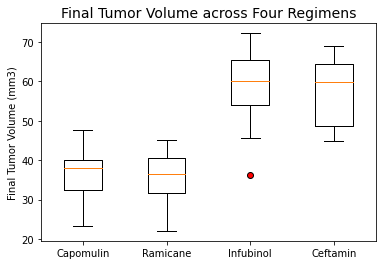

In [72]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

red_oval = dict(markerfacecolor = "r", marker = "o")
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_vol, flierprops = red_oval)
ax1.set_title("Final Tumor Volume across Four Regimens", fontsize = 14)
ax1.set_xticklabels(treatments)
plt.savefig('boxplot1')
plt.show()

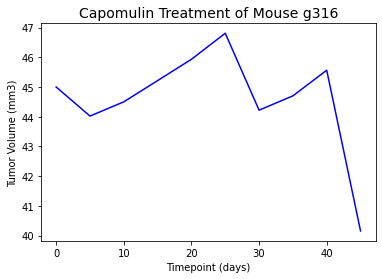

In [67]:
#LINE AND SCATTER PLOTS
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tumor_volume_df.loc[tumor_volume_df["Drug Regimen"] == "Capomulin"].head()


# I choose Mouse Id -g316
g316_tumor = clean_summary_df.loc[clean_summary_df["Mouse ID"]=="g316"]
#g316_tumor


plt.plot(g316_tumor["Timepoint"],g316_tumor["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mouse g316", fontsize = 14)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig('Lineplot1')
plt.show()




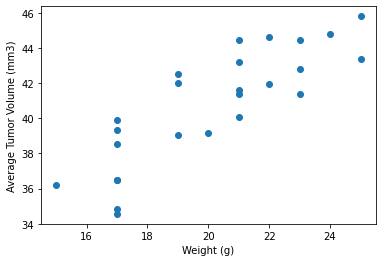

In [68]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = clean_summary_df.loc[clean_summary_df["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
avg_tumor_capomulin = capomulin_df["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_df["Weight (g)"].unique()
plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig('scatterplot1')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84.


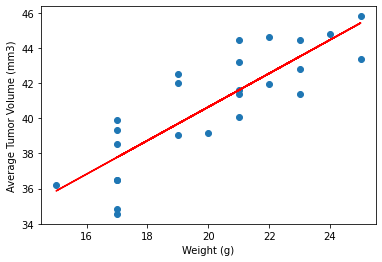

In [76]:
#CORELATION AND REGRESSION
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = mouse_weight.astype(float)

correlation = st.pearsonr(mouse_weight, avg_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_capomulin)

regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(mouse_weight, avg_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.savefig('corelation & Regression')
#plt.annotate(line_eq,(0,10),fontsize = 10,color = 'red')
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}.")




In [ ]:
Three observations:
    
1.The distribution of female and male mice in this study are almost equal.
2.Mice treated with either Capomulin or Ramicane regimen have smaller final tumor volume, 
   compared to those treated with either Infubinol or Ceftamin regimen.
3.For the Capomulin regimen treated group, mouse weight and the average tumor volume are positively correlated.




